In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_us = pd.read_csv('/data/clean_youtube_dataframe_us.csv',engine='python')

In [6]:
df_in = pd.read_csv('/data/clean_youtube_dataframe_in.csv',engine='python')

In [7]:
df_ca = pd.read_csv('/data/clean_youtube_dataframe_ca.csv',engine='python')

In [8]:
df_us.head()

Unnamed: 0     video_id                                              title  \
0          0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1          1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2          2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3          3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4          4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis        22.0   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends        20.0   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye        24.0   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL        10.0   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate        26.0   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count     likes  dislikes  comment_count  \
0   1514614.0  156908.0    5855.0        35313.0   
1   2381688.0  146739.0    2794.0        16549.0   
2   2038853.0  353787.0    2628.0        40221.0   
3    496771.0   23251.0    1856.0         7647.0   
4   1123889.0   45802.0     964.0         2196.0   

                                   thumbnail_link comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg             False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg             False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg             False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg             False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg             False   

  ratings_disabled                                        description  \
0            False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...   
1            False  While running her own modding shop, Ramya Pare...   
2            False  I left youtube for a month and this is what ha...   
3            False  Subscribe to XXL → http://bit.ly/subscribe-xxl...   
4            False  Transforming The LaBrant Family's empty white ...   

  time_of_day day_of_week  
0     Evening     Tuesday  
1   Afternoon     Tuesday  
2   Afternoon     Tuesday  
3   Afternoon     Tuesday  
4   Afternoon     Tuesday

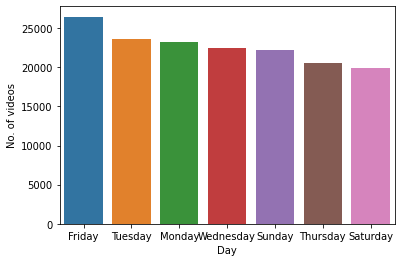

In [9]:
new_df_us = df_us["day_of_week"].value_counts().to_frame().reset_index().rename(columns={"index": "day_of_week", "day_of_week": "No_of_videos"})
figure, axis = plt.subplots()
hist = sns.barplot(x="day_of_week", y="No_of_videos",data=new_df_us,ax=axis)
labels = axis.set(xlabel="Day", ylabel="No. of videos")

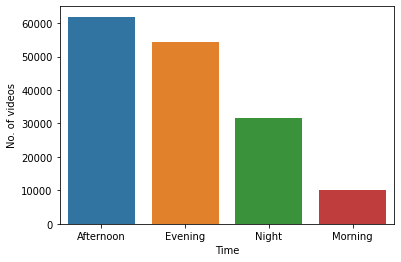

In [10]:
new_df_us = df_us["time_of_day"].value_counts().to_frame().reset_index().rename(columns={"index": "time_of_day", "time_of_day": "No_of_videos"})
figure, axis = plt.subplots()
hist = sns.barplot(x="time_of_day", y="No_of_videos",data = new_df_us, ax=axis)
labels = axis.set(xlabel="Time", ylabel="No. of videos")

In [11]:
new_df_us.head()

time_of_day  No_of_videos
0   Afternoon         61937
1     Evening         54479
2       Night         31653
3     Morning         10173

In [12]:
df_us= df_us.drop(['Unnamed: 0'],axis=1)
df_in= df_in.drop(['Unnamed: 0'],axis=1)
df_ca= df_ca.drop(['Unnamed: 0'],axis=1)

In [13]:
df_us1 = df_us.dropna()
df_in1 = df_in.dropna()
df_ca1 = df_ca.dropna()



```
[# This is formatted as code](https://)
```

# Analysis on US Dataset

<ipython-input-14-4611f0f77f9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us1["has_capital"] = df_us1["title"].apply(hasCapitalWord)


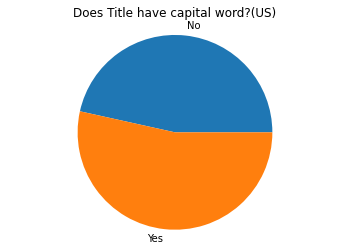

In [14]:
# Videos with Capital letters in them.
def hasCapitalWord(t):
  for each_word in t.split():
      if each_word.isupper():
        return True
  return False
df_us1["has_capital"] = df_us1["title"].apply(hasCapitalWord)
counts = df_us1["has_capital"].value_counts().to_dict()
figure, axis = plt.subplots()
_ = axis.pie([counts[False], counts[True]], labels=['No', 'Yes'],startangle=0)
_ , _ = axis.axis('equal') , axis.set_title('Does Title have capital word?(US)')

In [15]:
df_us1["has_capital"].value_counts()


True     84612
False    73630
Name: has_capital, dtype: int64

<ipython-input-16-252c68e5959f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us1["title_length"] = df_us1["title"].apply(lambda t: len(t))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


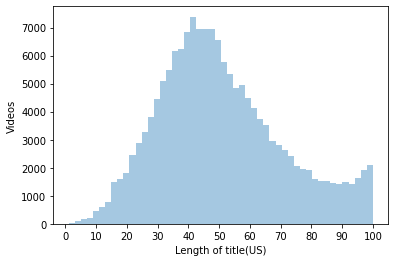

In [16]:
# Video Title vs Views
df_us1["title_length"] = df_us1["title"].apply(lambda t: len(t))
figure, axis = plt.subplots()
_ = sns.distplot(df_us1["title_length"],kde=False,ax=axis)
_ = axis.set(xlabel="Length of title(US)", ylabel="Videos", xticks=range(0, 110, 10))

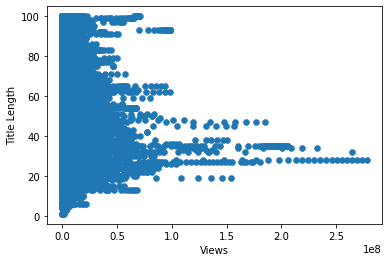

In [17]:
figure, axis = plt.subplots()
_ = axis.scatter(x=df_us1['view_count'], y=df_us1['title_length'],linewidths=0.5)
_ = axis.set(xlabel="Views", ylabel="Title Length")

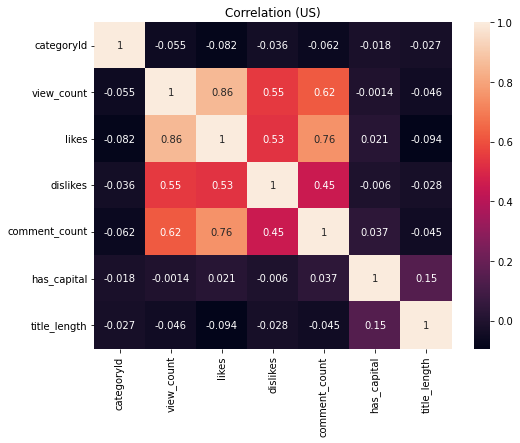

In [18]:
plt.figure(figsize = (8,6))
sns.heatmap(df_us1.corr(), annot= True)
plt.title("Correlation (US)")

plt.show()



```
[# This is formatted as code](https://)
```

# Analysis on India Dataset

<ipython-input-19-c435044c1f39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in1["has_capital"] = df_in1["title"].apply(hasCapitalWord)


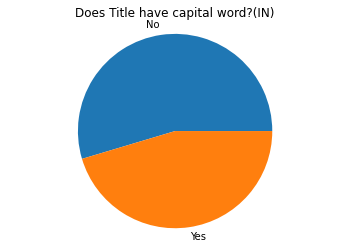

In [19]:
# Videos with Capital letters in them.
df_in1["has_capital"] = df_in1["title"].apply(hasCapitalWord)
counts = df_in1["has_capital"].value_counts().to_dict()
figure, axis = plt.subplots()
_ = axis.pie([counts[False], counts[True]], labels=['No', 'Yes'], startangle=0)
_ , _ = axis.axis('equal') , axis.set_title('Does Title have capital word?(IN)')

In [20]:
df_in1["has_capital"].value_counts()

False    75877
True     63033
Name: has_capital, dtype: int64

<ipython-input-21-6863488a267f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in1["title_length"] = df_in1["title"].apply(lambda t: len(t))


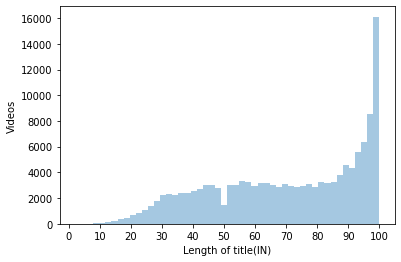

In [21]:
# Video Title vs Views
df_in1["title_length"] = df_in1["title"].apply(lambda t: len(t))
figure, axis = plt.subplots()
_ = sns.distplot(df_in1["title_length"],kde=False, ax=axis)
_ = axis.set(xlabel="Length of title(IN)", ylabel="Videos", xticks=range(0, 110, 10))

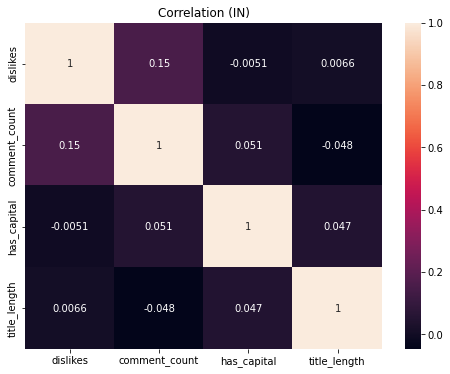

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(df_in1.corr(), annot= True)
plt.title("Correlation (IN)")
plt.show()

# Analysis of Canada Dataset

<ipython-input-23-0e2bc0843408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca1["has_capital"] = df_in1["title"].apply(hasCapitalWord)


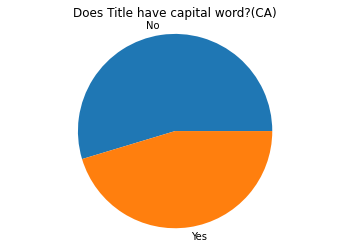

In [23]:
# Videos with Capital letters in them.
df_ca1["has_capital"] = df_in1["title"].apply(hasCapitalWord)
counts = df_ca1["has_capital"].value_counts().to_dict()
figure, axis = plt.subplots()
_ = axis.pie([counts[False], counts[True]], labels=['No', 'Yes'],startangle=0)
_ , _ = axis.axis('equal') , axis.set_title('Does Title have capital word?(CA)')

In [24]:
df_ca1["has_capital"].value_counts()

False    66553
True     55221
Name: has_capital, dtype: int64

<ipython-input-25-d67b6bbd1cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca1["title_length"] = df_ca1["title"].apply(lambda t: len(t))


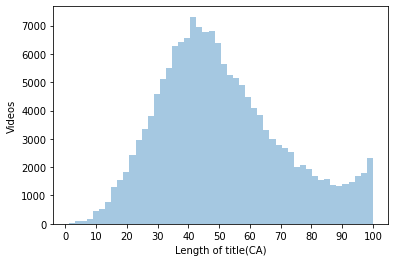

In [25]:
# Video Title vs Videos
df_ca1["title_length"] = df_ca1["title"].apply(lambda t: len(t))
figure, axis = plt.subplots()
_ = sns.distplot(df_ca1["title_length"] , kde=False,ax=axis)
_ = axis.set(xlabel="Length of title(CA)", ylabel="Videos", xticks=range(0, 110, 10))

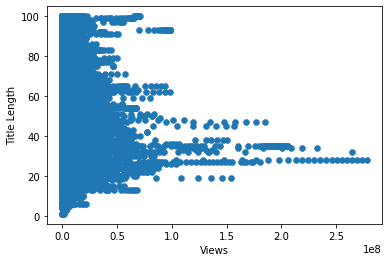

In [26]:
figure, axis = plt.subplots()
_ = axis.scatter(x=df_us1['view_count'], y=df_us1['title_length'],linewidths=0.5)
_ = axis.set(xlabel="Views", ylabel="Title Length")

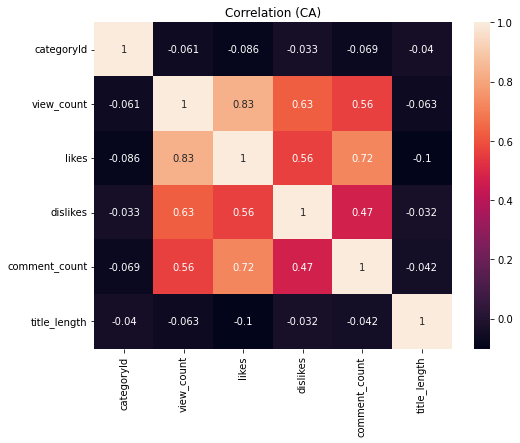

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(df_ca1.corr(), annot= True)
plt.title("Correlation (CA)")
plt.show()

# Predict Video Category

In [28]:
df_us1.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis        22.0   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends        20.0   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye        24.0   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL        10.0   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate        26.0   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count     likes  dislikes  comment_count  \
0   1514614.0  156908.0    5855.0        35313.0   
1   2381688.0  146739.0    2794.0        16549.0   
2   2038853.0  353787.0    2628.0        40221.0   
3    496771.0   23251.0    1856.0         7647.0   
4   1123889.0   45802.0     964.0         2196.0   

                                   thumbnail_link comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg             False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg             False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg             False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg             False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg             False   

  ratings_disabled                                        description  \
0            False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...   
1            False  While running her own modding shop, Ramya Pare...   
2            False  I left youtube for a month and this is what ha...   
3            False  Subscribe to XXL → http://bit.ly/subscribe-xxl...   
4            False  Transforming The LaBrant Family's empty white ...   

  time_of_day day_of_week  has_capital  title_length  
0     Evening     Tuesday         True            34  
1   Afternoon     Tuesday        False            60  
2   Afternoon     Tuesday         True            53  
3   Afternoon     Tuesday         True            56  
4   Afternoon     Tuesday         True            55

In [29]:
# Getting the needed columns
cols = ['title','categoryId']
new_csv = df_us1[cols]
new_csv.to_csv("new_csv.csv", index=False)

In [30]:
#read csv 
new_csv = pd.read_csv("new_csv.csv", header=0, names=['Title','CategoryID'])

In [31]:
# Reads the json containing the category ID and the category name
us_category_json = pd.read_json("/content/drive/MyDrive/US_category_id.json")
us_category_json.head()

kind                         etag  \
0  youtube#videoCategoryListResponse  HIrK3n45Uw2IYz9_U2-gK1OsXvo   
1  youtube#videoCategoryListResponse  HIrK3n45Uw2IYz9_U2-gK1OsXvo   
2  youtube#videoCategoryListResponse  HIrK3n45Uw2IYz9_U2-gK1OsXvo   
3  youtube#videoCategoryListResponse  HIrK3n45Uw2IYz9_U2-gK1OsXvo   
4  youtube#videoCategoryListResponse  HIrK3n45Uw2IYz9_U2-gK1OsXvo   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': 'IfW...  
1  {'kind': 'youtube#videoCategory', 'etag': '5XG...  
2  {'kind': 'youtube#videoCategory', 'etag': 'HCj...  
3  {'kind': 'youtube#videoCategory', 'etag': 'ra8...  
4  {'kind': 'youtube#videoCategory', 'etag': '7mq...

In [32]:
# mapping ID to title
dict_category = []
for i in us_category_json['items']:
  dict_category.append({'id': i['id'], 'title': i['snippet']['title']})

In [33]:
dict_category

[{'id': '1', 'title': 'Film & Animation'},
 {'id': '2', 'title': 'Autos & Vehicles'},
 {'id': '10', 'title': 'Music'},
 {'id': '15', 'title': 'Pets & Animals'},
 {'id': '17', 'title': 'Sports'},
 {'id': '18', 'title': 'Short Movies'},
 {'id': '19', 'title': 'Travel & Events'},
 {'id': '20', 'title': 'Gaming'},
 {'id': '21', 'title': 'Videoblogging'},
 {'id': '22', 'title': 'People & Blogs'},
 {'id': '23', 'title': 'Comedy'},
 {'id': '24', 'title': 'Entertainment'},
 {'id': '25', 'title': 'News & Politics'},
 {'id': '26', 'title': 'Howto & Style'},
 {'id': '27', 'title': 'Education'},
 {'id': '28', 'title': 'Science & Technology'},
 {'id': '29', 'title': 'Nonprofits & Activism'},
 {'id': '30', 'title': 'Movies'},
 {'id': '31', 'title': 'Anime/Animation'},
 {'id': '32', 'title': 'Action/Adventure'},
 {'id': '33', 'title': 'Classics'},
 {'id': '34', 'title': 'Comedy'},
 {'id': '35', 'title': 'Documentary'},
 {'id': '36', 'title': 'Drama'},
 {'id': '37', 'title': 'Family'},
 {'id': '38', '

In [34]:
category_dict_to_df = pd.DataFrame(dict_category)
category_dict_to_df = category_dict_to_df.rename(index=str, columns={"id": "CategoryID", "title": "Category"})

In [35]:
category_dict_to_df[:10]

CategoryID          Category
0          1  Film & Animation
1          2  Autos & Vehicles
2         10             Music
3         15    Pets & Animals
4         17            Sports
5         18      Short Movies
6         19   Travel & Events
7         20            Gaming
8         21     Videoblogging
9         22    People & Blogs

In [36]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6c92b56fda9b7a8b2b485661e6f6ea4921c1431e562139f617c6fc1303a6c403
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [37]:
#text vectorization
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()

In [38]:
count_vectorizer_fit = count_vectorizer.fit_transform(new_csv['Title'].values)

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
getvalues = new_csv['CategoryID'].values

In [40]:
nb_classifier.fit(count_vectorizer_fit,getvalues)

MultinomialNB()

In [41]:
from sklearn.model_selection import train_test_split
in_,out_ = count_vectorizer_fit,getvalues
X_train, X_test, y_train, y_test = train_test_split(in_, out_, test_size = 0.2)

In [42]:
mnNBClassifier = MultinomialNB().fit(X_train, y_train)
nb_predictions = mnNBClassifier.predict(X_test)

In [43]:
accuracy_mnNBClassifier = mnNBClassifier.score(X_test, y_test)
print('Accuracy on the model')
accuracy_mnNBClassifier

Accuracy on the model


0.8171822174476286

In [44]:
test_titles = ["Dua Lipa - New Rules (Official Music Video)",
        "All Sports Baseball Battle | Dude Perfect",
        "Biden says ‘more important things’ than border crisis as he heads to Arizona",
        "I Build My Print - Comedian Keenan Baker"
         ]

In [45]:
title_tranformed = count_vectorizer.transform(test_titles)
predicted_category = mnNBClassifier.predict(title_tranformed)

In [46]:
predicted_category

array([10., 17., 25., 22.])

In [47]:
categories = []
for id in predicted_category:
    same = []
    for x in dict_category:
      if x["id"] == str(int(id)):
        same.append(x)
    if same:
      categories.append(same[0]["title"])
print(categories)

['Music', 'Sports', 'News & Politics', 'People & Blogs']


In [48]:
title_Cat_list = []
for i in range(len(test_titles)):
   category = {'Title': test_titles[i],  'Category': categories[i]}
   title_Cat_list.append(category)
print(title_Cat_list)

[{'Title': 'Dua Lipa - New Rules (Official Music Video)', 'Category': 'Music'}, {'Title': 'All Sports Baseball Battle | Dude Perfect', 'Category': 'Sports'}, {'Title': 'Biden says ‘more important things’ than border crisis as he heads to Arizona', 'Category': 'News & Politics'}, {'Title': 'I Build My Print - Comedian Keenan Baker', 'Category': 'People & Blogs'}]


In [49]:
predict_category_df = pd.DataFrame(predicted_category)
title_Cat_list_df = pd.DataFrame(title_Cat_list)
concat_df =  pd.concat([predict_category_df, title_Cat_list_df], axis=1)
concat_df.columns = (['CategoryID', 'Title of the video', 'Predicted Video Category'])

In [50]:
columns = concat_df.columns.tolist()
columns = columns[-1:] + columns[:-1]
concat_df = concat_df[columns]
column_titles = ["CategoryID","Title of the video","Predicted Video Category"]
output_df=concat_df.reindex(columns=column_titles)
output_df

CategoryID                                 Title of the video  \
0        10.0        Dua Lipa - New Rules (Official Music Video)   
1        17.0          All Sports Baseball Battle | Dude Perfect   
2        25.0  Biden says ‘more important things’ than border...   
3        22.0           I Build My Print - Comedian Keenan Baker   

  Predicted Video Category  
0                    Music  
1                   Sports  
2          News & Politics  
3           People & Blogs